# (FOR POSTER) Axisymmetric Spacetimes : Schwarzschild in Isotropic

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D

## Importing & Accessing data 

In [3]:
df = pd.read_csv("data.csv")
print(df)

theta = df["theta"].values
h = df["h"].values

            theta    h
0    1.000000e-08  0.5
1    1.578691e-02  0.5
2    3.157381e-02  0.5
3    4.736070e-02  0.5
4    6.314760e-02  0.5
..            ...  ...
195  3.078445e+00  0.5
196  3.094232e+00  0.5
197  3.110019e+00  0.5
198  3.125806e+00  0.5
199  3.141593e+00  0.5

[200 rows x 2 columns]


### Accessing the iterations

In [26]:
it0 = pd.read_csv("iteration_000.csv")
print(it0)
it1 = pd.read_csv("iteration_001.csv")
print(it1)
it2 = pd.read_csv("iteration_002.csv")
print(it2)
it3 = pd.read_csv("iteration_003.csv")
print(it3)
it4 = pd.read_csv("iteration_004.csv")
print(it4)

            theta         h
0    1.000000e-08  0.800000
1    1.578691e-02  0.799801
2    3.157381e-02  0.799204
3    4.736070e-02  0.798211
4    6.314760e-02  0.796827
..            ...       ...
195  3.078445e+00  0.796827
196  3.094232e+00  0.798211
197  3.110019e+00  0.799204
198  3.125806e+00  0.799801
199  3.141593e+00  0.800000

[200 rows x 2 columns]
            theta         h
0    1.000000e-08  0.604918
1    1.578691e-02  0.604920
2    3.157381e-02  0.604937
3    4.736070e-02  0.604965
4    6.314760e-02  0.604999
..            ...       ...
195  3.078445e+00  0.605118
196  3.094232e+00  0.605086
197  3.110019e+00  0.605060
198  3.125806e+00  0.605045
199  3.141593e+00  0.605043

[200 rows x 2 columns]
            theta         h
0    1.000000e-08  0.506586
1    1.578691e-02  0.506586
2    3.157381e-02  0.506586
3    4.736070e-02  0.506587
4    6.314760e-02  0.506586
..            ...       ...
195  3.078445e+00  0.506513
196  3.094232e+00  0.506513
197  3.110019e+00  0.506514


In [28]:
h_0 = it0["h"].values
h_1 = it1["h"].values
h_2 = it2["h"].values
h_3 = it3["h"].values
h_4 = it4["h"].values

## Values of your own control!

In [4]:
# Modify the value here (from input.py):
Ntheta = 200

# Modify with your own phi resolution! 
phi = np.linspace(0, 2*np.pi, Ntheta)

# Making a meshgrid of theta and phi values
phi_grid, theta_grid = np.meshgrid(phi, theta)

## Initial guess function $h(\theta)_{\text{guess}}$, from Input.py

### See here -> https://www.desmos.com/calculator/x6iyq0kvln

In [5]:
def hguess(theta):
    return  0.5*(1 + 0.2*np.cos(4*theta)) + 0.2

h0 = hguess(theta)
#print(h0)

## Conversion to Cartesian coordinates for 3D visualisations

In [6]:
def cartesian(r, t, p):
    x = np.sqrt(r**2)*np.sin(t)*np.cos(p)
    y = np.sqrt(r**2)*np.sin(t)*np.sin(p)
    z = r*np.cos(t)
    return x, y, z

In [7]:
# Make h0 and h 2D arrays matching theta_grid
h0_2d = np.tile(h0[:, np.newaxis], (1, phi_grid.shape[1]))
h_2d = np.tile(h[:, np.newaxis], (1, phi_grid.shape[1]))

# Converting to Cartesian 
x0, y0, z0 = cartesian(h0_2d, theta_grid, phi_grid)
xsol, ysol, zsol= cartesian(h_2d, theta_grid, phi_grid)

## Plotting! 

### 2D Visualisation

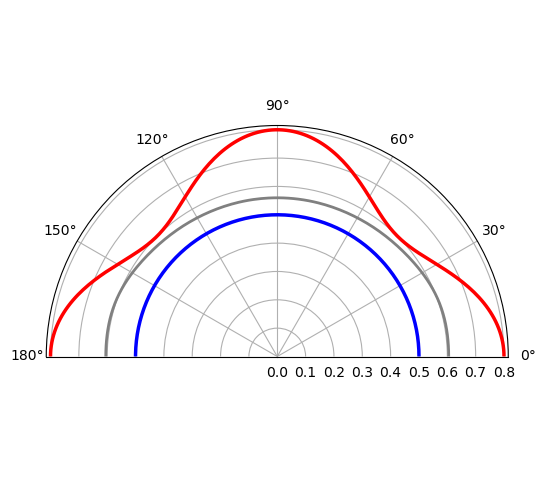

In [56]:
fig2D_polar = plt.figure(figsize=(15, 6))
ax = fig2D_polar.add_subplot(111, polar=True)

cmap = cm.Greys

ax.set_thetamin(0)
ax.set_thetamax(180)
ax.plot(theta, h0, label=r"Initial guess $h_0$", color="red", linewidth=2.5)
ax.plot(theta, h_1, color="grey", linewidth=2.0)
ax.plot(theta, h, label=r"Horizon $h(\theta)$", color="blue", linewidth=2.5)
#ax.set_title("Apparent Horizon, Isotropic Schwarzschild (polar plane)")
#ax.legend()

plt.savefig("./Plots/AHpolarConverging.png", dpi=300, bbox_inches="tight")
plt.show()

### 3D Visualisation

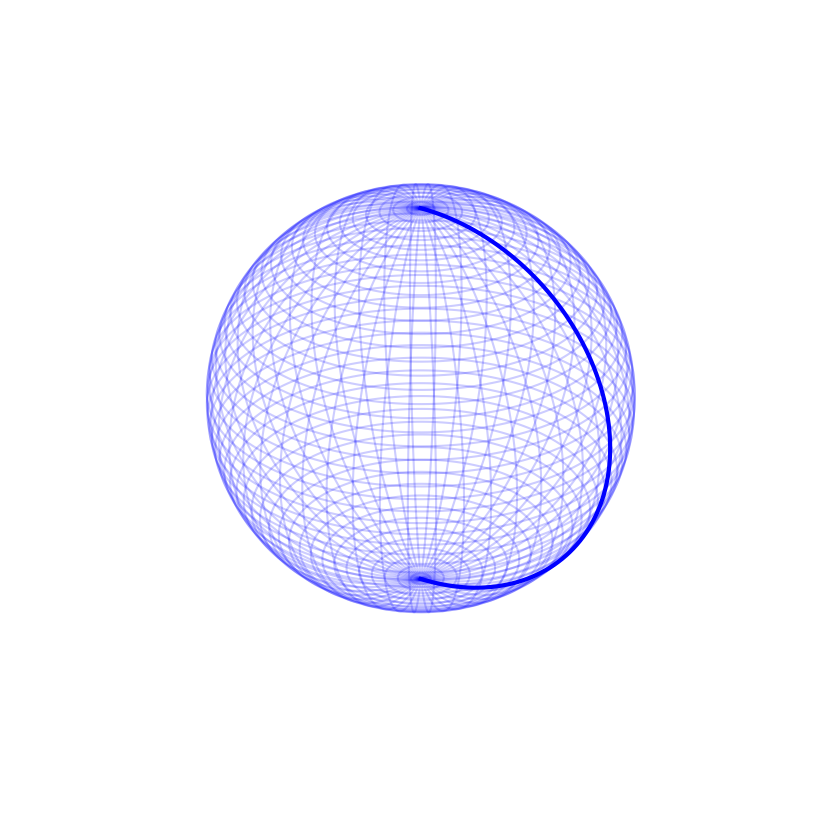

In [25]:
fig3D = plt.figure(figsize=(10,8))
ax = fig3D.add_subplot(111, projection='3d')

#ax.scatter(x0, y0, z0, c="orange", label="Initial guess", s=10)
#ax.scatter(xsol, ysol, zsol, c="blue", label="Solution", s=10)
#ax.plot_wireframe(x0, y0, z0, color="red", alpha=0.1, label="Initial guess")
#ax.plot(x0[:, 0], y0[:, 0], z0[:, 0], color="red", linewidth=3.0)
ax.plot_wireframe(xsol, ysol, zsol, color="blue", alpha=0.2, label="Solution")
ax.plot(xsol[:, 0], ysol[:, 0], zsol[:, 0], color="blue", linewidth=3.0)


ax.set_aspect('equal')
#ax.set_xlabel("x")
#ax.set_ylabel("y")
#ax.set_zlabel("z")
#ax.set_title("Apparent Horizon (Isotropic Schwarzschild) in 3D")
#ax.legend()
ax.set_axis_off()
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)

plt.savefig("./Plots/InitialG.png", dpi=300, bbox_inches="tight")
plt.show()

### Cross section of 3D plot above

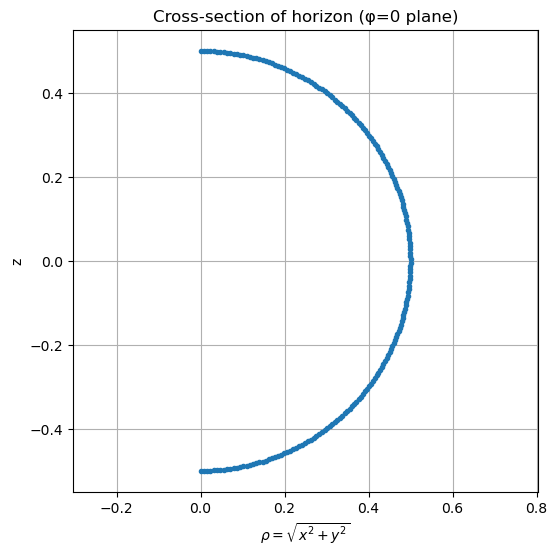

In [10]:
i_phi = 0  # slice at phi = 0 plane
x_slice = xsol[:, i_phi]
y_slice = ysol[:, i_phi]
z_slice = zsol[:, i_phi]

rho_slice = np.sqrt(x_slice**2 + y_slice**2)

plt.figure(figsize=(6,6))
plt.plot(rho_slice, z_slice, '-o', markersize=3)
plt.xlabel(r'$\rho = \sqrt{x^2 + y^2}$')
plt.ylabel('z')
plt.title('Cross-section of horizon (φ=0 plane)')
plt.axis('equal')
plt.grid(True)
plt.show()